# Regression: Lasso

Introduction to Machine Learning, BCAM & UPV/EHU course, by Carlos Cernuda, Ekhine Irurozki and Aritz Perez.


## References 

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). 
An introduction to statistical learning (Vol. 112). New York: springer.
* Data sets: http://www-bcf.usc.edu/~gareth/ISL/data.html
* SCIKIT-LEARN library example http://scikit-learn.org
* References Jupyter notebooks:
    - R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016)
    http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
    - General Assembly's Data Science course in Washington, DC
    https://github.com/justmarkham/DAT4
    - An Introduction to Statistical Learning (James, Witten, Hastie, Tibshirani, 2013) adapted to Python code
    https://github.com/JWarmenhoven/ISLR-python

In [1]:
##########################################################
import numpy as np #scientific computing (n-dim arrays, etc)
import pandas as pd #data analysis library
##########################################################
# Plots:
import matplotlib.pyplot as plt 
import matplotlib.pylab as pylab
import seaborn as sns #visualization library based on matplotlib
%matplotlib inline
plt.style.use(['seaborn-white'])   
params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (15, 5),
              'axes.labelsize': 'xx-large',
              'axes.titlesize':'xx-large',
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large'}    
pylab.rcParams.update(params)  #fix the parameters for the plots

pd.set_option('display.notebook_repr_html', False)
##########################################################
# SKLEARN: scikit-learn machine learning tools
from sklearn.preprocessing import scale ###Standardize a dataset 
import sklearn.linear_model as skl_lm ###linear model regression
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.metrics import mean_squared_error
##########################################################
np.random.seed(0)

## Data set: Hitters
Hitters data set: Records and salaries for baseball players.

* baseball player’s Salary (measured in thousands of dollars)
* Years (the number of years that he has played in the major leagues)
* Hits (the number of hits that he made in the previous year)

In [2]:
hitters = pd.read_csv('dataset/Hitters.csv', index_col=0).dropna()
#removes all of the rows that have missing values in any variable
hitters.describe()

            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   403.642586  107.828897   11.619772   54.745247   51.486692   41.114068   
std    147.307209   45.125326    8.757108   25.539816   25.882714   21.718056   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    282.500000   71.500000    5.000000   33.500000   30.000000   23.000000   
50%    413.000000  103.000000    9.000000   52.000000   47.000000   37.000000   
75%    526.000000  141.500000   18.000000   73.000000   71.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun        CRuns  \
count  263.000000    263.000000   263.000000  263.000000   263.000000   
mean     7.311787   2657.543726   722.186312   69.239544   361.220532   
std      4.793616   2286.582929   648.199644   82.1

In [3]:
hitters.head(3)

               AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
-Alan Ashby      315    81      7    24   38     39     14    3449    835   
-Alvin Davis     479   130     18    66   72     76      3    1624    457   
-Andre Dawson    496   141     20    65   78     37     11    5628   1575   

               CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  \
-Alan Ashby        69    321   414     375      N        W      632       43   
-Alvin Davis       63    224   266     263      A        W      880       82   
-Andre Dawson     225    828   838     354      N        E      200       11   

               Errors  Salary NewLeague  
-Alan Ashby        10   475.0         N  
-Alvin Davis       14   480.0         A  
-Andre Dawson       3   500.0         N  

## Dummy Predictor Variables

In [4]:
# Prepare the response and predictor variables
# Response variable
y_salary = hitters.Salary

In [5]:
# Predictor variables

# Add dummy variables
# League A/N
# Division East West
# NewLeague A/N
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
#dummies.describe()
dummies.head(3)

               League_A  League_N  Division_E  Division_W  NewLeague_A  \
-Alan Ashby           0         1           0           1            0   
-Alvin Davis          1         0           0           1            1   
-Andre Dawson         0         1           1           0            0   

               NewLeague_N  
-Alan Ashby              1  
-Alvin Davis             0  
-Andre Dawson            1  

In [6]:
# Delete the column with the independent variable (Salary), and change columns for which we created dummy variables
x_predictors_ = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Include the new dummy variables
x_predictors = pd.concat([x_predictors_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
#x_predictors.describe()
x_predictors.head(3)

               AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  \
-Alan Ashby    315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0   
-Alvin Davis   479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0   
-Andre Dawson  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   

               CHmRun  CRuns   CRBI  CWalks  PutOuts  Assists  Errors  \
-Alan Ashby      69.0  321.0  414.0   375.0    632.0     43.0    10.0   
-Alvin Davis     63.0  224.0  266.0   263.0    880.0     82.0    14.0   
-Andre Dawson   225.0  828.0  838.0   354.0    200.0     11.0     3.0   

               League_N  Division_W  NewLeague_N  
-Alan Ashby           1           1            1  
-Alvin Davis          0           1            0  
-Andre Dawson         1           0            1  

## Train and Test 

We now split the samples into a TRAIN set and a TEST set in order
to estimate later on the test error of lasso regression and select the parameter using cross-validation.

In [7]:
# Split data into training and test sets
# (Fct) Split arrays or matrices into random train and test subsets
X_train, X_test , y_train, y_test = train_test_split(x_predictors, y_salary, test_size=0.5, random_state=1)

# test_size: represent the proportion of the dataset to include in the test split
# random_state: is the seed used by the random number generator

## Lasso fitting method
### Fix lasso parameter by using a uniform grid
We will generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept:

In [8]:
lambdas = 2*10**np.linspace(10,-2,100)*0.5
print(lambdas.shape)
print(min(lambdas))
print(max(lambdas))

(100,)
0.01
10000000000.0


Associated with each alpha value is a vector of Lasso regression coefficients, which we will
store in a matrix called `coefs`. In this case, it is a $19 \times 100$
matrix, with 19 rows (one for each predictor) and 100
columns (one for each value of alpha). 

We will want to standardize the
variables so that they are on the same scale. To do this, we can use the
`normalize = True` parameter:

In [9]:
# Load the model
regr_model_lasso = skl_lm.Lasso(max_iter=10000, normalize=True)

In [10]:
coefs = []
for a in lambdas:
    regr_model_lasso.set_params(alpha=a)
    regr_model_lasso.fit(scale(X_train), y_train)
    coefs.append(regr_model_lasso.coef_)

#scale(X_train)
#from sklearn.preprocessing import scale
#Standardize a dataset along any axis
#Center to the mean and component wise scale to unit variance.

In [11]:
np.shape(coefs)

(100, 19)

We expect the coefficient estimates to be much smaller, in terms of $l_1$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used. Let's plot and find out:

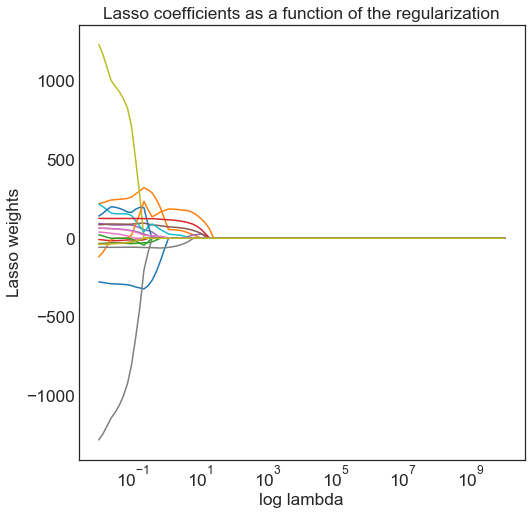

In [12]:
# PLOT
# x axis: grid values of lambda (log scale to see something)
# y axis 
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.plot(lambdas, coefs) 
ax.set_xscale('log') 
plt.axis('tight')
plt.xlabel('log lambda')
plt.ylabel('Lasso weights')
plt.title('Lasso coefficients as a function of the regularization');

### Select the best parameter value
Notice that in the coefficient plot that depending on the choice of the $\lambda$
parameter, some of the coefficients are exactly equal to zero. 

In order to select the best $\lambda$ (that is, the best lasso model). We perform a K-fold cross-validation with $K=10$.

In [ ]:
#Select the best Lambda Parameter (MODEL)
# Scikit Learn sklearn.linear_model.LassoCV.
#Lasso linear model with iterative fitting along a regularization path
#The best model is selected by cross-validation.

regr_model_lassocv = skl_lm.LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
regr_model_lassocv.fit(X_train, y_train)

#alphas = None; If None alphas are set automatically
#cv : int, integer, to specify the number of folds.
#max_iter:  The maximum number of iterations
#normalize = True; X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

#Value of the lambda parameter obtained
print(regr_model_lassocv.alpha_)

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(regr_model_lasso.coef_, index=x_predictors.columns)

### Check the Mean Squared predictive error

Fit the model with the TRAIN data and then test the error obtained over the TEST data.

$$
MSE=\frac{1}{N-n}\sum_{i=n+1}^N y_i -\hat{y}_i
$$

In [ ]:
# Error with the Best lambda
regr_model_lasso.set_params(alpha=regr_model_lassocv.alpha_)
regr_model_lasso.fit(X_train, y_train);
mean_squared_error(y_test, regr_model_lasso.predict(X_test))

In [ ]:
# Error is bigger with the 1st lambda of the grid
regr_model_lasso.set_params(alpha=lambdas[-1])
regr_model_lasso.fit(X_train, y_train)
mean_squared_error(y_test, regr_model_lasso.predict(X_test))

In [ ]:
# Error is bigger with the last lambda of the grid
regr_model_lasso.set_params(alpha=lambdas[0])
regr_model_lasso.fit(X_train, y_train)
mean_squared_error(y_test, regr_model_lasso.predict(X_test))